
# Загружаем данные

In [114]:
import pandas as pd
data = pd.read_csv('athletes.csv')

In [115]:
data

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


In [117]:
data[ pd.isnull( data['height'] ) ].head()  #находим и удаляем пропуски

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [118]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


# Строим модель

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [121]:
features_columns = [c for c in data.columns if c != 'sex']
X = data[features_columns]
X.head()

,id,name,nationality,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,11/26/90,1.81,71.0,cycling,0,0,0


In [122]:
y = data['sex']

In [123]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [124]:
le.fit( data['sex'] )

LabelEncoder()

In [125]:
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

In [126]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]

In [127]:
model = LogisticRegression()

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [129]:
model.fit(X_train, y_train)

LogisticRegression()

In [130]:
pred = model.predict_proba (X_test)

In [92]:
pred

array([[0.10537934, 0.89462066],
       [0.90888807, 0.09111193],
       [0.78123216, 0.21876784],
       ...,
       [0.80450446, 0.19549554],
       [0.717164  , 0.282836  ],
       [0.18628073, 0.81371927]])

# Строим ROC-кривую с помощью функции roc_curve

In [131]:
from sklearn.metrics import roc_curve

In [132]:
fpr, tpr, thres = roc_curve( y_test, pred[:, 1])

In [133]:
from matplotlib import pyplot as plt

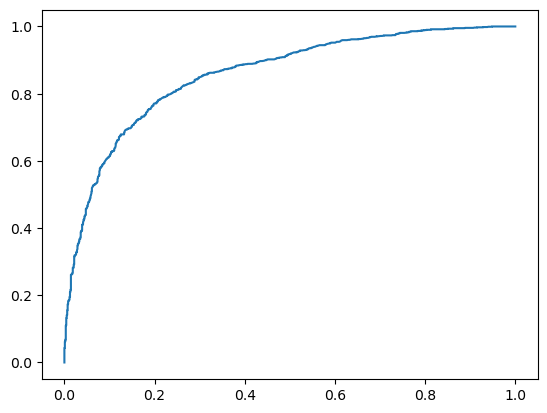

In [134]:
plt.plot(fpr, tpr)

In [97]:
from sklearn.metrics import roc_auc_score
roc_auc_score (y_test, pred[:,1])

0.8504033053522353

# Вычисляем метрики вручную

In [135]:
import numpy as np
thresholds = np.arange(0, 1, 0.1)

fprs = []
tprs = []
prs = []
res = []

for threshold in thresholds:
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    for predicted_prob, actual in zip( pred[:, 1], y_test ):
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpr1 = tp/(tp + fn)
    fpr1 = fp/(fp + tn)
    precision = tp/(tp + fp)
    recall = tpr1 
    fprs.append(fpr1)
    tprs.append(tpr1)
    prs.append(precision)
    res.append(recall)


In [136]:
tp, fp, fn, tn

(321, 17, 884, 950)

 # Сравниваем кривые

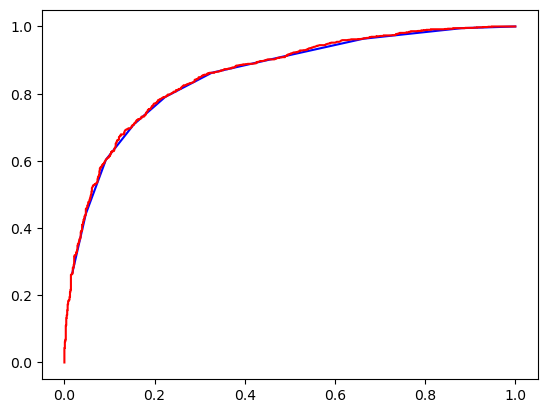

In [138]:
plt.plot(fprs, tprs, color="blue");
plt.plot(fpr, tpr, color = 'red')
plt.show()
     

In [139]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8577690337142294

In [140]:
auc(fprs, tprs)

0.8511381824267208

(0.0, 1.0)

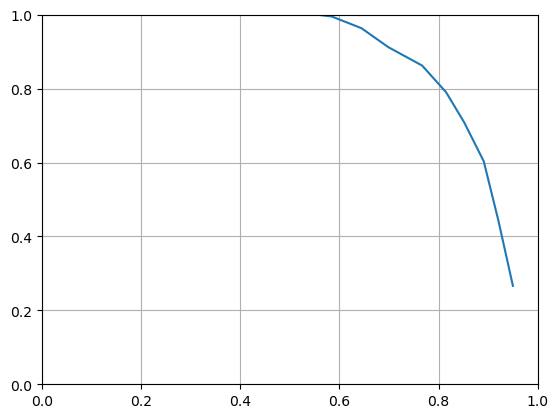

In [141]:
plt.plot(prs, res)
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)

И в случае использования готовой функции, и в случае вычислений вручную модель показывает хорошие показатели, различия незначительны. В целом можно сделать вывод, что предпочтительнее и удобнее пользоваться готовыми библиотечными функциями для вычисления метрик оценки качества модели, так как это элементарно быстрее и меньше кода. Однако хорошо на всякий случай знать, как сделать это вручную